<a href="https://colab.research.google.com/github/Joacco11/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [84]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#1. An√°lisis de facturaci√≥n



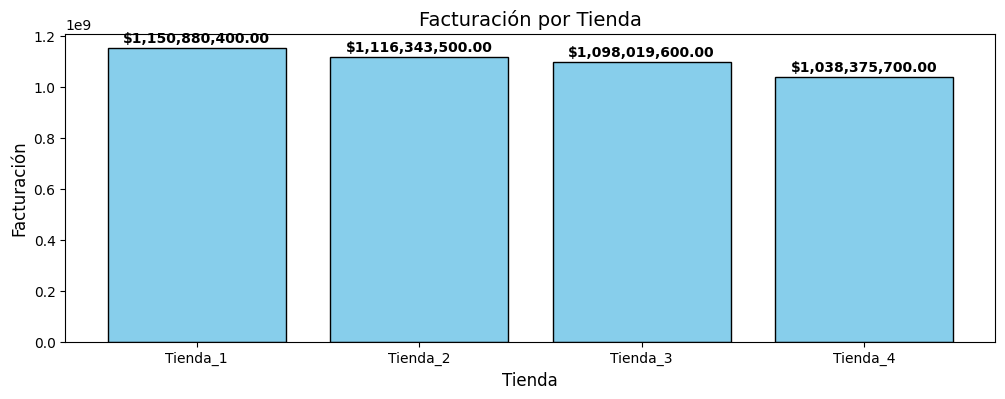

In [82]:
def facturacion_total():
    # Calcular facturaci√≥n por tienda
    facturacion_1 = tienda['Precio'].sum()
    facturacion_2 = tienda2['Precio'].sum()
    facturacion_3 = tienda3['Precio'].sum()
    facturacion_4 = tienda4['Precio'].sum()

    facturacionXTienda = {
        'Tienda_1': facturacion_1,
        'Tienda_2': facturacion_2,
        'Tienda_3': facturacion_3,
        'Tienda_4': facturacion_4
    }

    # Crear gr√°fico de barras
    plt.figure(figsize=(12, 4))
    barras = plt.bar(facturacionXTienda.keys(), facturacionXTienda.values(),
                     color='skyblue', edgecolor='black')

    # T√≠tulo y ejes
    plt.title("Facturaci√≥n por Tienda", fontsize=14)
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Facturaci√≥n", fontsize=12)
    # Agregar etiquetas encima de cada barra
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, altura + (altura * 0.01),
                 f"${altura:,.2f}", ha='center', va='bottom',
                 fontsize=10, fontweight='bold')
    plt.show()
facturacion_total()

# 2. Ventas por categor√≠a

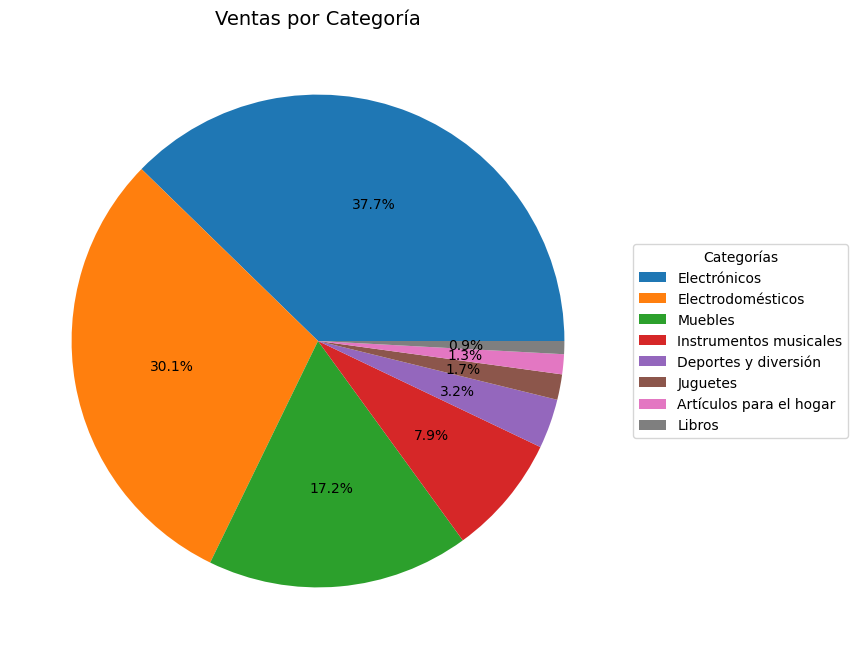

In [81]:
def ventas_por_categoria():
  # Unir todos los DataFrames en uno solo
  tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])

  # Agrupar por categor√≠a y sumar ventas
  ventas_por_categoria = tiendas_combinadas.groupby('Categor√≠a del Producto')['Precio'].sum().reset_index()

  # Ordenar de mayor a menor
  ventas_por_categoria = ventas_por_categoria.sort_values(by='Precio', ascending=False)
  plt.figure(figsize=(8,8))
  plt.pie(
    ventas_por_categoria['Precio'],
    autopct='%1.1f%%',
  )

  # Leyenda
  plt.legend(
      ventas_por_categoria['Categor√≠a del Producto'],
      title="Categor√≠as",
      loc="center left",
      bbox_to_anchor=(1, 0.5)
  )
  # T√≠tulo
  plt.title("Ventas por Categor√≠a", fontsize=14)
  plt.show()
ventas_por_categoria()

In [89]:
tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])
tiendas_combinadas.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

# 3. Calificaci√≥n promedio de la tienda


In [37]:
def calificacion_promedio():
  # Calcular calificaci√≥n promedio por tienda
  calif_tienda1 = tienda['Calificaci√≥n'].mean()
  calif_tienda2 = tienda2['Calificaci√≥n'].mean()
  calif_tienda3 = tienda3['Calificaci√≥n'].mean()
  calif_tienda4 = tienda4['Calificaci√≥n'].mean()

  # Crear DataFrame con resultados
  calificaciones = pd.DataFrame({
      'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
      'Calificaci√≥n Promedio': [calif_tienda1, calif_tienda2, calif_tienda3, calif_tienda4]
  })

  # Ordenar de mayor a menor calificaci√≥n
  calificaciones = calificaciones.sort_values(by='Calificaci√≥n Promedio', ascending=False)

  plt.figure(figsize=(8,5))
  barras = plt.barh(calificaciones['Tienda'], calificaciones['Calificaci√≥n Promedio'], color='lightgreen', edgecolor='black')

  # Etiquetas y t√≠tulo
  plt.xlabel("Calificaci√≥n Promedio")
  plt.title("Calificaci√≥n Promedio por Tienda", fontsize=14)
  plt.xlim(0, 5)  # Escala de calificaci√≥n (asumiendo de 1 a 5)
  plt.grid(axis='x', linestyle='--', alpha=0.7)

  # Mostrar valores en cada barra
  for barra in barras:
      plt.text(barra.get_width() + 0.05, barra.get_y() + barra.get_height()/2,
              f"{barra.get_width():.2f}", va='center', fontsize=10, fontweight='bold')

  plt.show()

# 4. Productos m√°s y menos vendidos

In [ ]:
def productos_mas_menos_vendidos():
  # Unir todos los DataFrames
  tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])

  # Contar ventas por producto
  ventas_por_producto = tiendas_combinadas['Producto'].value_counts().reset_index()
  ventas_por_producto.columns = ['Producto', 'Cantidad de Ventas']

  # Calcular porcentaje
  total_ventas = ventas_por_producto['Cantidad de Ventas'].sum()
  ventas_por_producto['Porcentaje'] = (ventas_por_producto['Cantidad de Ventas'] / total_ventas) * 100

  # Formatear a 3 decimales
  ventas_por_producto['Porcentaje'] = ventas_por_producto['Porcentaje'].round(3)

  # Top 5 m√°s vendidos (DataFrame)
  mas_vendidos = ventas_por_producto.head(5)

  # Top 5 menos vendidos (DataFrame)
  menos_vendidos = ventas_por_producto.tail(5)

  # Mostrar tablas en formato pandas
  print("üìà Productos m√°s vendidos:")
  display(mas_vendidos)

  print("üìâ Productos menos vendidos:")
  display(menos_vendidos)


# 5. Env√≠o promedio por tienda

In [54]:
def envio_promedio():
    # Calcular costo de env√≠o promedio por tienda
    envio_tienda1 = tienda['Costo de env√≠o'].mean()
    envio_tienda2 = tienda2['Costo de env√≠o'].mean()
    envio_tienda3 = tienda3['Costo de env√≠o'].mean()
    envio_tienda4 = tienda4['Costo de env√≠o'].mean()

    # Crear DataFrame con resultados
    df_envio = pd.DataFrame({
        'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Env√≠o Promedio': [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]
    })

    # Ordenar y redondear
    df_envio = df_envio.sort_values(by='Env√≠o Promedio', ascending=False)
    df_envio['Env√≠o Promedio'] = df_envio['Env√≠o Promedio'].round(2)

    # Devolver solo la tabla estilizada
    return df_envio.style.format({
        'Env√≠o Promedio': 'S/. {:.2f}'
    }).background_gradient(subset='Env√≠o Promedio', cmap='RdYlGn_r')

envio_promedio()

# 6. Sistema Final


In [ ]:
while True:
    print("\n===== MEN√ö ALURA STORE =====")
    print("1. Facturaci√≥n total por tienda")
    print("2. Ventas por categor√≠a")
    print("3. Calificaci√≥n promedio por tienda")
    print("4. Productos m√°s y menos vendidos")
    print("5. Env√≠o promedio por tienda")
    print("0. Salir")

    try:
        opcion = int(input("Elige una opci√≥n (0-5): "))
        if opcion == 0:
            print("Saliendo del sistema...")
            break
        elif opcion == 1:
            facturacion_total()
        elif opcion == 2:
            ventas_por_categoria()
        elif opcion == 3:
            calificacion_promedio()
        elif opcion == 4:
            productos_mas_menos_vendidos()
        elif opcion == 5:
            envio_promedio()
        else:
            raise ValueError("Opci√≥n fuera de rango.")
    except ValueError as e:
        print(f"Error: {e}. Intenta de nuevo ingresando un n√∫mero v√°lido.")
    except Exception as e:
        print(f"Ocurri√≥ un error inesperado: {e}")